# XYZ Corp. - Default Loan Prediction and Analysis

#### Problem Statement
In this project, you will have to manage credit risk by using the past data and deciding whom to give the loan to in the future.

The data is retrieved from [Kaggle](https://www.kaggle.com/sonujha090/xyzcorp-lendingdata/version/1).

As per the problem statemen, the steps will be followed are as follows:
- Exploratory Data Analysis (EDA)
    - Data Preprocessing Cleaning
    - Variable Transformations
    - Various plots to study trends and correlations between features
- Feature Engineering
- Model Building, Testing, Selection and Validation
- Final Results and Analysis

In [1]:
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

sns.set_style('darkgrid')

## Exploratory Data Analysis (EDA)
### Data Preprocessing and Cleaning

In [2]:
df = pd.read_csv("XYZCorp_LendingData.txt",sep='\t',low_memory=False)
df.shape

(855969, 73)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

'default_ind' is the target variable.  
We check for missing values and will remove features/columns with missing values more than 70%.

In [5]:
# Missing Values and percentages in dataframe
def missing_values_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
null_values = missing_values_percentage(df)
null_values[null_values['Percent']>=70]

,Total,Percent
all_util,842681,98.45
annual_inc_joint,855527,99.95
desc,734157,85.77
dti_joint,855529,99.95
il_util,844360,98.64
inq_fi,842681,98.45
inq_last_12m,842681,98.45
max_bal_bc,842681,98.45
mths_since_last_major_derog,642830,75.10
mths_since_last_record,724785,84.67


We have 20 variables which can be removed before analysis.  
We are also removing observations where all values are NAs.

In [6]:
df.drop(null_values[null_values['Percent']>=70].index, axis=1, inplace=True)
df.dropna(axis=0,thresh=30, inplace=True)

After analysis of dataset and variables, we can remove following variables:

1. policy_code is always equal to 1.
2. payment_plan has only 10 y and 887372 n.
3. id and member_id are all unique. So every record is a unique customer.
4. application_type is 'INDIVIDUAL' for 99.94% of the records.
5. acc_now_delinq is 0 for 99.5% of the records.
6. emp_title not needed here.
7. zip_code not needed for this level of analysis.
8. title can be removed as well.

In [7]:
df.drop(['policy_code','pymnt_plan', 'id', 'member_id', 'application_type',
         'acc_now_delinq','emp_title', 'zip_code','title'], axis=1, inplace=True)

Again checking missing values in order to impute data for missing values in columns.

In [8]:
missing_values_percentage(df)

,Total,Percent
mths_since_last_delinq,439812,51.38
next_pymnt_d,252971,29.55
tot_cur_bal,67313,7.86
tot_coll_amt,67313,7.86
total_rev_hi_lim,67313,7.86
emp_length,43061,5.03
last_pymnt_d,8862,1.04
revol_util,446,0.05
collections_12_mths_ex_med,56,0.01
last_credit_pull_d,50,0.01


## Feature Engineering

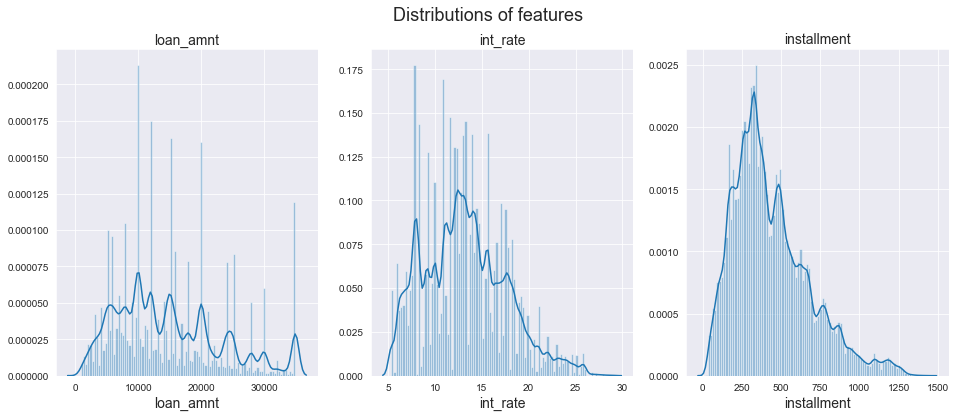

In [9]:
num = ['loan_amnt','int_rate','installment']

fig, axes = plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Distributions of features",fontsize=18)


for ax, feature in zip(axes.flatten(),num):
    sns.distplot(df[feature],hist=True,bins=100,ax=ax)
    ax.set_title(feature,fontsize=14)
    ax.set_xlabel(feature,fontsize=14)
    ax.set_ylabel('',fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

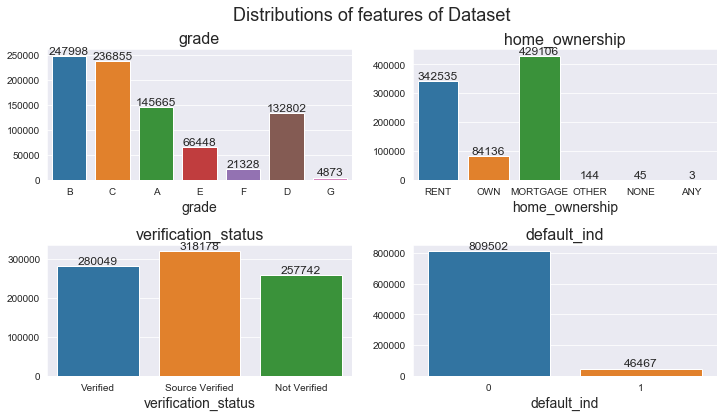

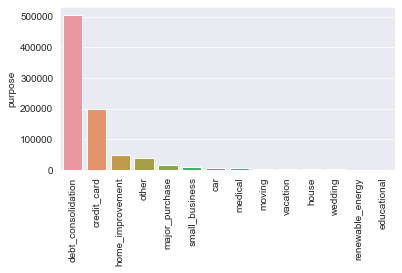

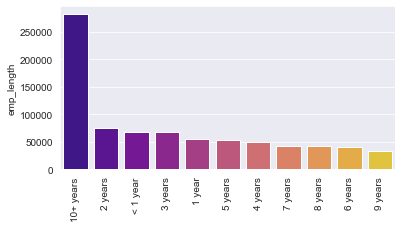

In [10]:
def bar_annot(ax):
    totals = []
    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.4, i.get_height()-3,str(i.get_height()),fontsize=12, ha='center',va='bottom')


obj = ['grade','home_ownership','verification_status','default_ind']

fig, axes = plt.subplots(2,2,figsize=(12,6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Distributions of features of Dataset",fontsize=18)

for ax, feature in zip(axes.flatten(),obj):
    sns.countplot(df[feature],ax=ax,label='medium')
    ax.set_title(feature,fontsize=16)
    ax.set_xlabel(feature,fontsize=14)
    ax.set_ylabel('',fontsize=14)
    bar_annot(ax)

fig, ax = plt.subplots(1,1,figsize=(6,3))
sns.barplot(x = df['purpose'].value_counts().index,y=df['purpose'].value_counts(),ax=ax)
plt.xticks(rotation=90)
#bar_annot(ax)
fig, ax = plt.subplots(1,1,figsize=(6,3))
sns.barplot(x = df['emp_length'].value_counts().index,y=df['emp_length'].value_counts(),ax=ax,palette='plasma')
plt.xticks(rotation=90)

Now we can choose the features from the dataset to design the model. We again check for missing values and transforming features for modelling if necessary.

- The bar graph for target variable, 'default_ind' shows that the dataset is imbalanced. So, we need to take care of this in or before modelling.
- Let's keep the loan_amount and let's create a new feature which indicates that the total amount committed by investors for that loan at that point in time (funded_amnt_inv) is less than what the borrower requested.
- We are keeping interest grade only (excluding sub-grade) as it does not changes with time. The interest rate is an important metrics, but it changes with time. So, we will not interest rate.
- The feature 'delinq_2yrs' have value equals to zero for more than 80% of data. Let's make it categorical: (No - delinq_2yrs == 0) and (yes when delinq_2yrs > 0)
- Same as above for inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- Same as above for pub_rec: Number of derogatory public records
- Let's compute the ratio of the number of open credit lines in the borrower's credit file divided by the total number of credit lines currently in the borrower's credit file.

In [11]:
df['less_amnt_inv'] = df['funded_amnt']-df['funded_amnt_inv']
df['less_amnt_inv'] = np.where(df['less_amnt_inv'] == 0, 'equal', 'less')

df['delinq_2yrs_cat'] = df['delinq_2yrs'].apply(lambda x: 'no' if (x==0) else 'yes')
df['inq_last_6mths_cat'] = df['inq_last_6mths'].apply(lambda x: 'no' if (x==0) else 'yes')
df['pub_rec_cat'] = df['pub_rec'].apply(lambda x: 'no' if (x==0) else 'yes')
df['acc_ratio'] = df['open_acc']/df['total_acc']

In [12]:
# Listing out the features to be used in modelling
features = ['loan_amnt','less_amnt_inv','installment','grade','emp_length','home_ownership',
           'verification_status','purpose','dti','delinq_2yrs_cat','inq_last_6mths_cat','pub_rec_cat',
           'initial_list_status','acc_ratio','issue_d','default_ind']

In [13]:
df_new = df[features]
df_new.dropna(axis=0,how='any',inplace=True)

In [14]:
missing_values_percentage(df_new)

,Total,Percent


Now no null values in the dataset.

In [15]:
# Dividing dataset into Train and Test Datasets.
# The Test dataset contains all loan information data from Jun-2015 to Dec-2015.

test_months = ['Jun-2015','Jul-2015','Aug-2015','Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015']

train = df_new[-df_new['issue_d'].isin(test_months)]
train.drop(['issue_d'],axis=1,inplace=True)
test = df_new[df_new['issue_d'].isin(test_months)]
test.drop(['issue_d'],axis=1,inplace=True)

# Getting dummy variables for the categorical features
cat_cols = train.select_dtypes(include='object').columns.to_list()
train = pd.get_dummies(train,columns=cat_cols).astype(float)
test = pd.get_dummies(test,columns=cat_cols).astype(float)
print("The shape of train dataset is {} and shappe of test dataset is {}".format(train.shape,test.shape))

The shape of train dataset is (570873, 56) and shappe of test dataset is (242035, 53)


We can see that there is a mismatch in the number of columns in model training and test data. It is because there are some columns in some variables that are present in the training dataset but not test dataset. We will remove those variables from training data to avoid errors later.

In [16]:
[i for i in train.columns.to_list()+test.columns.to_list() if i not in train.columns.to_list() or i not in test.columns.to_list()]

['home_ownership_NONE', 'home_ownership_OTHER', 'purpose_educational']

Above variables are not present in test dataset. We will remove those variables from training data to avoid errors later.

In [17]:
train.drop(['home_ownership_NONE', 'home_ownership_OTHER', 'purpose_educational'],axis=1,inplace=True)

In [18]:
Y_train = train['default_ind']
X_train = train.drop(['default_ind'],axis=1)

Y_test = test['default_ind']
X_test = test.drop(['default_ind'],axis=1)

## Model Building, Testing, Selection and Validation

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [20]:
def timer(start_time=None):
    from datetime import datetime
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        return "%i:%i:%s" % (thour, tmin, round(tsec, 2))
#        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [21]:
def run_model(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    acc_score = np.round(sm.accuracy_score(ytest,ypred)*100,2)
    return acc_score

In [22]:
acc_scores = []
model_run_time = []
model_names = ['Logistic','KNN','Naive Bayes','Decision Tree', 'Random Forest']
models = [LogisticRegression(class_weight='balanced'),KNeighborsClassifier(),GaussianNB(),
         DecisionTreeClassifier(class_weight='balanced'),RandomForestClassifier(class_weight='balanced')]
for i in models:
    start_time = timer(None)
    score = run_model(i,X_train,Y_train,X_test,Y_test)
    exe_time = timer(start_time)
    model_run_time.append(exe_time)
    acc_scores.append(score)

In [23]:
pd.DataFrame({'Model':model_names,'Accuracy':acc_scores,'Execution Time':model_run_time},index=range(1,len(model_names)+1))

,Model,Accuracy,Execution Time
1,Logistic,71.74,0:0:52.78
2,KNN,99.52,0:2:23.62
3,Naive Bayes,97.84,0:0:2.51
4,Decision Tree,93.51,0:0:27.41
5,Random Forest,99.69,0:0:43.64


### Note that we have given equal weightage to both classes of target variable while generating machine learning model. 
All these calculations are carried out on machine having AMD Ryzen 5 processor with 8 GB RAM.
### Above table shows the performance of KNN machine learning model is better than other basic machine learning models but it is time consuming while Gaussian Naive Bayes model takes very less time to give more than 97% accuracy for test data. The ensembled machine learning model, random forest performs better in both the categories, accuracy for test data and time required to create the model. We can improve the performance of these models by tuning their hyperparameters.

### The results after hyperparameter tuning will be updated soon.